In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
output=pd.read_csv('output.csv')

In [3]:
#checking the first five rows
output.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
#Checking the number of rows and columns the dataset has
output.shape

(885548, 5)

In [5]:
#checking for missing values
output.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [6]:
#this helps us to see how data has been spread for numerical values
output.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [7]:
#checking the column data types
output.dtypes

Year        int64
Month      object
State      object
County     object
Rate      float64
dtype: object

In [8]:
#checking the number of unique items under state
#This shows that there are 47 represented states in the State Column.
output.State.nunique()

47

In [9]:
#checking the unique items in the column state
names_state=output.State.unique()
names_state

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

In [10]:
#Checking the number of rows that each unique state occupies in the entire dataset
state_count=output['State'].value_counts()
state_count

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Indiana           29808
Ohio              28512
Minnesota         28188
Mississippi       26568
Oklahoma          24948
Arkansas          24300
Michigan          24236
Wisconsin         23328
Alabama           21708
Pennsylvania      21708
South Dakota      21384
Colorado          20736
New York          20088
Montana           18144
West Virginia     17820
North Dakota      17172
California        16878
South Carolina    14904
Idaho             14256
Washington        12636
Oregon            11664
New Mexico        10692
Utah               9396
Maryland           7776
Wyoming            7452
New Jersey         6804
Louisiana          6464
Nevada             5508
Maine              5184
Arizona            4860
Massachusetts      4536
Vermont         

In [11]:
#finding the number of unique values of county
output.County.nunique()

1752

In [12]:
#Counting the number of rows that each unique County occupies in the entire dataset
output['County'].value_counts()

Washington County                8930
Jefferson County                 7334
Lincoln County                   7107
Franklin County                  6986
Jackson County                   6654
                                 ... 
Catahoula Parish                  101
Sabine Parish                     101
Ascension Parish                  101
Saint John the Baptist Parish     101
Evangeline Parish                 101
Name: County, Length: 1752, dtype: int64

In [13]:
rate=output[output['Rate']==0]
print(rate)

        Year      Month  State           County  Rate
240571  1991   February  Texas    Loving County   0.0
245907  1991      March  Texas    Loving County   0.0
253942  1991    January  Texas    Loving County   0.0
261909  1991      April  Texas    Loving County   0.0
264736  1991   December  Texas    Loving County   0.0
270072  1991   November  Texas    Loving County   0.0
275416  1990    October  Texas  McMullen County   0.0
281122  1990     August  Texas  McMullen County   0.0
283943  1990        May  Texas  McMullen County   0.0
292152  1990  September  Texas  McMullen County   0.0
297526  1990   December  Texas    Loving County   0.0
316395  1993        May  Texas    Loving County   0.0
319216  1993    January  Texas    Loving County   0.0
324668  1993  September  Texas    Loving County   0.0
332623  1993       July  Texas    Loving County   0.0
343209  1992      March  Texas    Loving County   0.0
359437  1992      April  Texas    Loving County   0.0


The above information shows that Loving county experienced one of the lowest unemployment rate throughout history.
Also McMullen county experienced the lowest unemployment rate as well.
there was something that Texas was doing right through the period of 1990 to 1993 even though the country 
had experienced recession in 1990 to 1991

In [14]:
rates=output[output['Rate']>58]
print(rates)

        Year    Month     State           County  Rate
351231  1992  January  Colorado  San Juan County  58.4


The above county with the highest unemployment rate of all times was San Juan in Colorado in the year 1992
The US was just recoverng from the Early 1990 recession which lasted eight months from July 1990 to March 1991

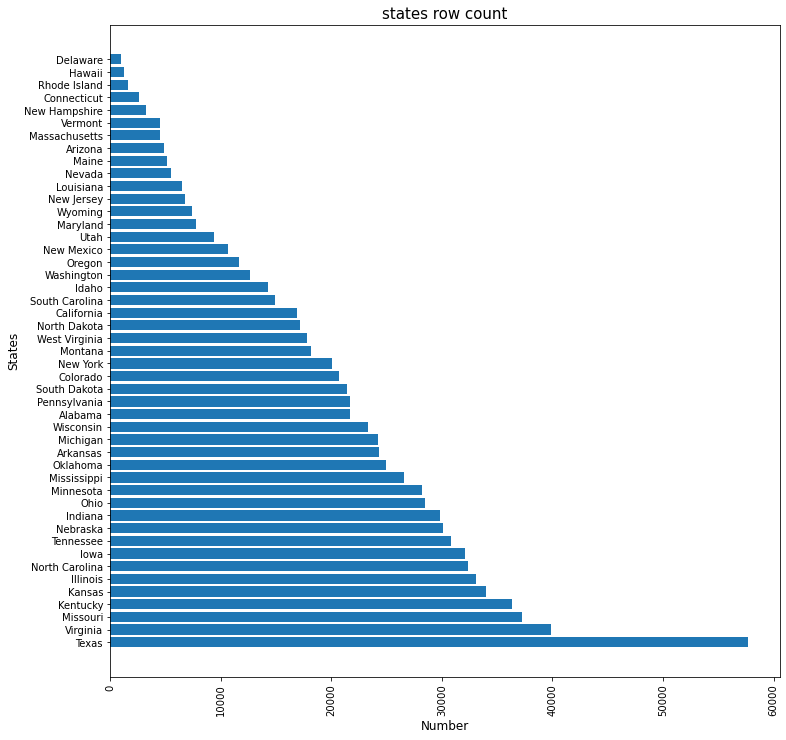

In [15]:
plt.figure(figsize=(12,12))
plt.barh( state_count.index, state_count.values)
plt.xlabel('Number', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('states row count', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Texas appeared the most in our dataset because it is the state with the second largest population
and it also has the highest number of counties, state has 254 counties.

In [16]:
#Grouping the dataset according to the average unemployment rate per year
#From this we can observe that the lowest unemployment rate was in 2000 and the highest in 2010
year= output.groupby(["Year"])["Rate"].aggregate("mean").reset_index()
print (year)

    Year      Rate
0   1990  6.093021
1   1991  7.142391
2   1992  7.464904
3   1993  6.924037
4   1994  6.186649
5   1995  5.893411
6   1996  5.912081
7   1997  5.474520
8   1998  5.114221
9   1999  4.873476
10  2000  4.321123
11  2001  4.985591
12  2002  5.720915
13  2003  6.027990
14  2004  5.695817
15  2005  5.438981
16  2006  4.979263
17  2007  4.896069
18  2008  5.759990
19  2009  8.883838
20  2010  9.189580
21  2011  8.523477
22  2012  7.657544
23  2013  7.211610
24  2014  6.096365
25  2015  5.401873
26  2016  5.160680


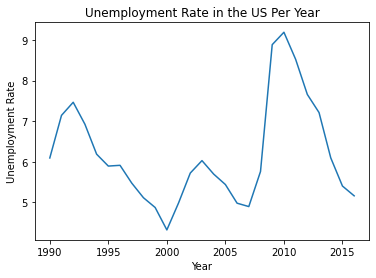

In [17]:
#Grouping the dataset according to the average unemployment rate per year
#From this we can observe that the lowest unemployment rate was in 2000 and the highest in 2010
plt.plot(year['Year'], year['Rate'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate in the US Per Year')
plt.show()

Unemployment rate was low in the year 2000, this was due to an economic expansion.

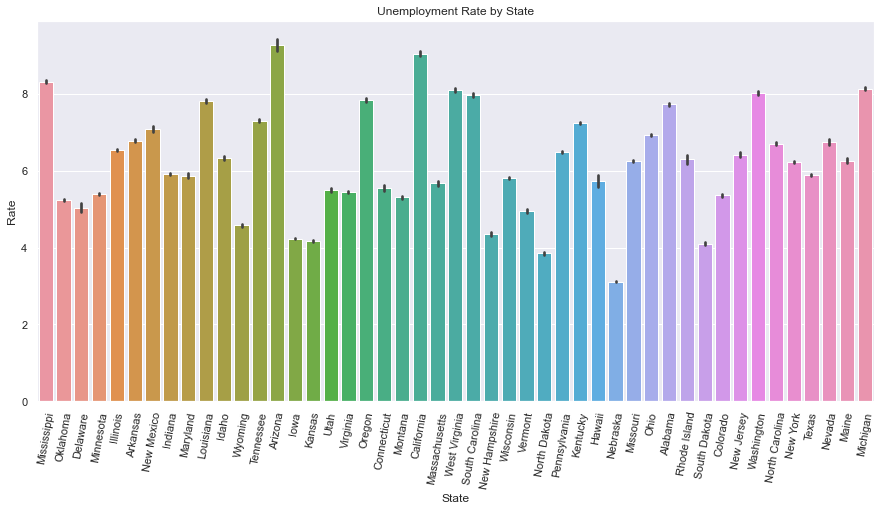

In [18]:
sns.set(rc=({'figure.figsize':(15,7)}))
ax=sns.barplot(data=output,x='State',y='Rate')
ax.set_title('Unemployment Rate by State')
for item in ax.get_xticklabels():
    item.set_rotation(80)

From this chat we can see that Arizona, California and Mississippi have the highest unemployment rates

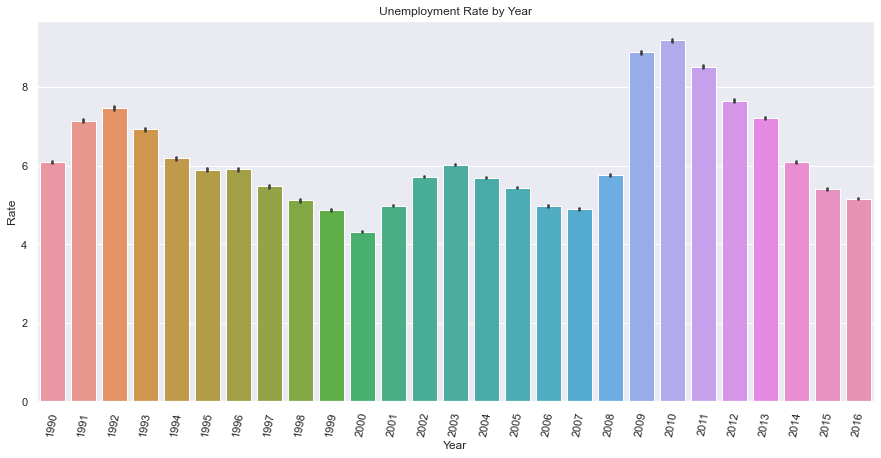

In [19]:
#Grouping the dataset according to the average unemployment rate per year
#From this we can observe that the lowest unemployment rate was in 2000 and the highest in 2010
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=output,x='Year',y='Rate')
ax.set_title('Unemployment Rate by Year')
for item in ax.get_xticklabels():
    item.set_rotation(80)


This statistic displays the unemployment rate from 1990-2016. Year 2000 
has the lowest rate of unemployment, while year 2010 has the highest unemployment rate.

In [20]:
#checking rows for 2000
yr_2000=output[output.Year.eq(2000)]
yr_2000

,Year,Month,State,County,Rate
636702,2000,February,Mississippi,Newton County,5.9
636703,2000,February,Mississippi,Panola County,6.5
636704,2000,February,Mississippi,Monroe County,6.7
636705,2000,February,Mississippi,Hinds County,5.0
636706,2000,February,Mississippi,Kemper County,8.6
...,...,...,...,...,...
670613,2000,November,Maine,Somerset County,4.7
670614,2000,November,Maine,Oxford County,4.2
670615,2000,November,Maine,Knox County,2.7
670616,2000,November,Maine,Piscataquis County,5.6


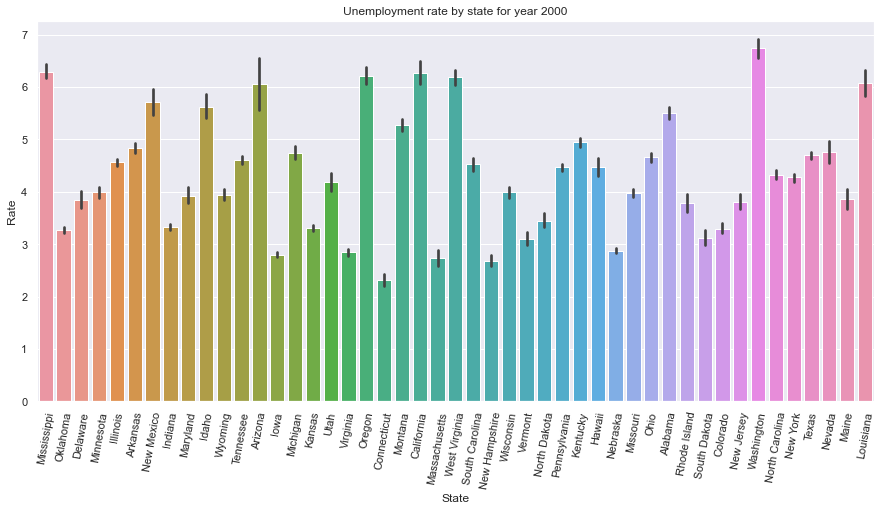

In [21]:
#checking for the state with unemployment rate in 2000
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=yr_2000,x='State',y='Rate')
ax.set_title('Unemployment rate by state for year 2000')
for item in ax.get_xticklabels():
    item.set_rotation(80)

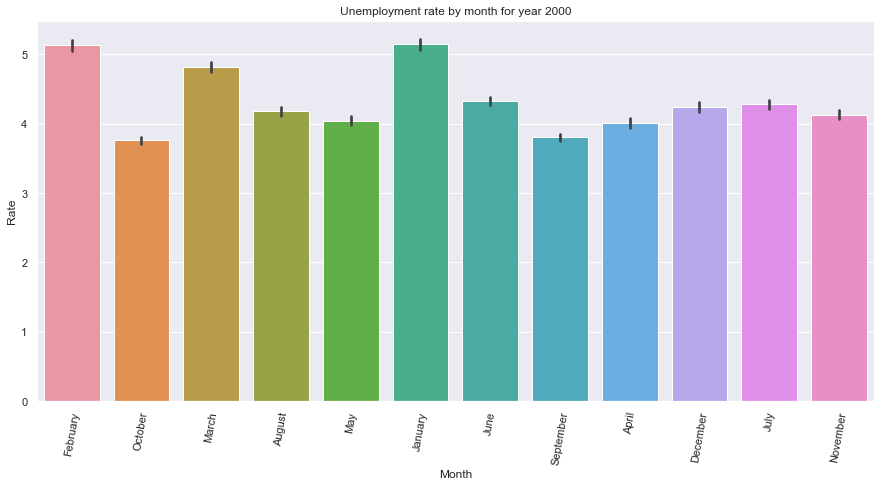

In [22]:
#checking for the month with unemployment rate in 2000
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=yr_2000,x='Month',y='Rate')
ax.set_title('Unemployment rate by month for year 2000')
for item in ax.get_xticklabels():
    item.set_rotation(80)

From this graph we can see that January, February and March have the highest rate, 
while September and October have the lowest rate of unemployment

In [23]:
#checking rows for 2010
yr_2010=output[output.Year.eq(2010)]
yr_2010

,Year,Month,State,County,Rate
136792,2010,February,Mississippi,Newton County,10.5
136793,2010,February,Mississippi,Panola County,15.0
136794,2010,February,Mississippi,Monroe County,14.3
136795,2010,February,Mississippi,Hinds County,10.4
136796,2010,February,Mississippi,Kemper County,14.5
...,...,...,...,...,...
171163,2010,November,Maine,Somerset County,11.2
171164,2010,November,Maine,Oxford County,10.7
171165,2010,November,Maine,Knox County,7.2
171166,2010,November,Maine,Piscataquis County,9.6


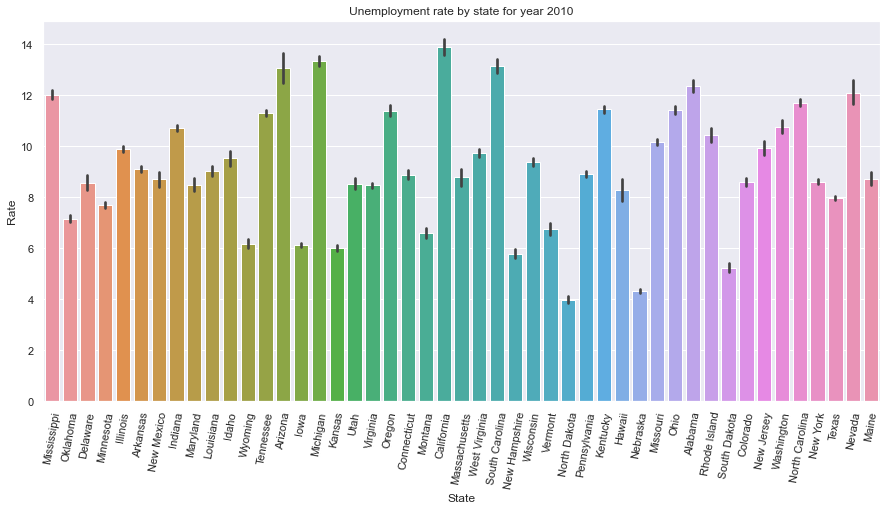

In [24]:
#checking for the state unemployment rate in 2010
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=yr_2010,x='State',y='Rate')
ax.set_title('Unemployment rate by state for year 2010')
for item in ax.get_xticklabels():
    item.set_rotation(80)

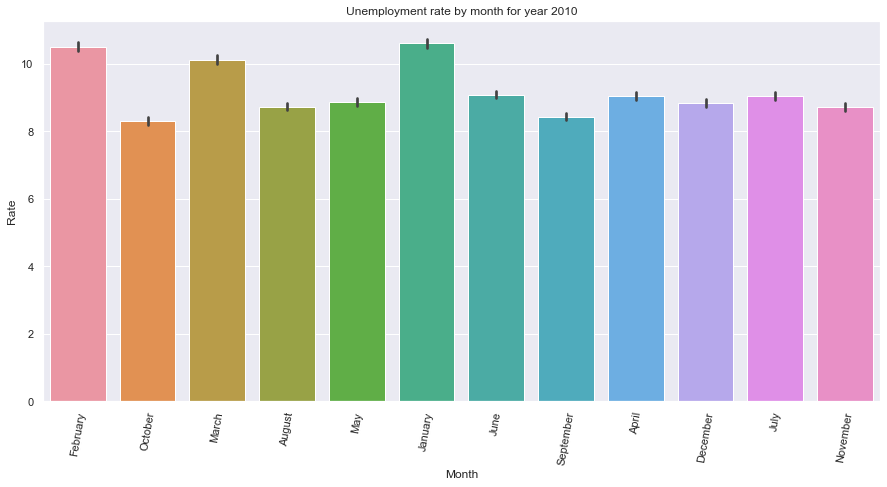

In [25]:
#checking for the month with the rate of unemployment in 2000
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=yr_2010,x='Month',y='Rate')
ax.set_title('Unemployment rate by month for year 2010')
for item in ax.get_xticklabels():
    item.set_rotation(80)

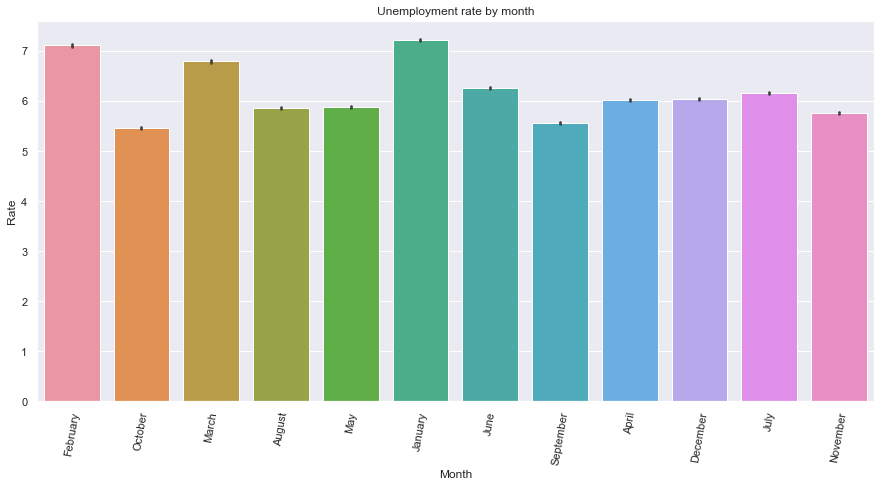

In [26]:
#checking for the state with unemployment rate
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=output,x='Month',y='Rate')
ax.set_title('Unemployment rate by month')
for item in ax.get_xticklabels():
    item.set_rotation(80)

January has the highest rate of unemployment because companies would have layoff their workers during that time.